In [6]:
import os
import numpy as np
import random
from PIL import Image, ImageEnhance

# Keras
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Input, Dense, Flatten, Dropout
from tensorflow.keras.preprocessing.image import load_img
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.applications import VGG16
from sklearn.utils import shuffle

In [7]:
pip install tensorflow

Note: you may need to restart the kernel to use updated packages.


In [8]:
pip --version

pip 24.2 from C:\Users\akash\anaconda3\Lib\site-packages\pip (python 3.12)

Note: you may need to restart the kernel to use updated packages.


In [9]:
import zipfile
path_to_zip = 'C:\\Users\\akash\\Downloads\\Brain_tumor_detection.zip'
with zipfile.ZipFile(path_to_zip, 'r') as zip_ref:
    zip_ref.extractall('Brain_tumor_detection')

In [10]:
%ls
%ls Brain_tumor_detection\\

 Volume in drive C is OS
 Volume Serial Number is E2F5-B7CD

 Directory of C:\Users\akash

05/01/2025  08:43 PM    <DIR>          .
01/11/2025  08:28 AM    <DIR>          ..
04/30/2025  03:24 PM    <DIR>          .anaconda
04/30/2025  03:35 PM    <DIR>          .conda
04/28/2025  11:29 AM               146 .condarc
04/28/2025  11:29 AM    <DIR>          .continuum
11/14/2024  01:12 PM    <DIR>          .dotnet
04/28/2025  01:36 PM    <DIR>          .ipynb_checkpoints
02/21/2025  04:14 PM    <DIR>          .ipython
04/30/2025  03:24 PM    <DIR>          .jupyter
04/30/2025  04:46 AM    <DIR>          .keras
01/31/2025  06:03 PM    <DIR>          .matplotlib
08/23/2024  10:02 PM    <DIR>          .ms-ad
08/27/2024  05:29 PM    <DIR>          .openshot_qt
04/28/2025  01:22 PM    <DIR>          .spyder-py3
11/14/2024  01:13 PM    <DIR>          .templateengine
08/01/2024  11:59 AM    <DIR>          .thumbnails
04/30/2025  03:24 PM    <DIR>          .virtual_documents
02/16/2025  04:51 PM  

In [11]:
# Define directories
train_dir = 'Brain_tumor_detection/Training'
test_dir = 'Brain_tumor_detection/Testing'

# Initialize lists for image paths and labels
train_paths = []
train_labels = []

# Check if train directory exists
if not os.path.exists(train_dir):
    print(f"Error: Training directory '{train_dir}' not found.")
else:
    # Loop through each label folder
    for label in os.listdir(train_dir):
        label_path = os.path.join(train_dir, label)
        
        # Ensure it's a directory and not a file
        if os.path.isdir(label_path):
            for image in os.listdir(label_path):
                image_path = os.path.join(label_path, image)
                
                # Ensure it's a valid image file
                if image.lower().endswith(('.jpg', '.png', '.jpeg')):
                    train_paths.append(image_path)
                    train_labels.append(label)

# Shuffle the data for randomness
if train_paths and train_labels:
    train_paths, train_labels = shuffle(train_paths, train_labels, random_state=42)
    print(f"Loaded {len(train_paths)} images with labels.")

else:
    print("Error: No images found in the dataset.")

# Example: Display the first few images and labels
print(train_paths[:5])  # Shows first 5 image paths
print(train_labels[:5])  # Shows first 5 labels


Loaded 5712 images with labels.
['Brain_tumor_detection/Training\\meningioma\\Tr-me_0379.jpg', 'Brain_tumor_detection/Training\\notumor\\Tr-no_0609.jpg', 'Brain_tumor_detection/Training\\glioma\\Tr-gl_0561.jpg', 'Brain_tumor_detection/Training\\pituitary\\Tr-pi_1210.jpg', 'Brain_tumor_detection/Training\\pituitary\\Tr-pi_1205.jpg']
['meningioma', 'notumor', 'glioma', 'pituitary', 'pituitary']


In [12]:
# Initialize lists for image paths and labels
test_paths = []
test_labels = []

# Check if test directory exists
if not os.path.exists(test_dir):
    print(f"Error: Training directory '{test_dir}' not found.")
else:
    # Loop through each label folder
    for label in os.listdir(test_dir):
        label_path = os.path.join(test_dir, label)
        
        # Ensure it's a directory and not a file
        if os.path.isdir(label_path):
            for image in os.listdir(label_path):
                image_path = os.path.join(label_path, image)
                
                # Ensure it's a valid image file
                if image.lower().endswith(('.jpg', '.png', '.jpeg')):
                    test_paths.append(image_path)
                    test_labels.append(label)

# Shuffle the data for randomness
if test_paths and test_labels:
    test_paths, test_labels = shuffle(test_paths, test_labels, random_state=42)
    print(f"Loaded {len(test_paths)} images with labels.")

else:
    print("Error: No images found in the dataset.")

# Example: Display the first few images and labels
print(test_paths[:5])  # Shows first 5 image paths
print(test_labels[:5])  # Shows first 5 labels


Loaded 1311 images with labels.
['Brain_tumor_detection/Testing\\pituitary\\Te-pi_0109.jpg', 'Brain_tumor_detection/Testing\\pituitary\\Te-pi_0061.jpg', 'Brain_tumor_detection/Testing\\glioma\\Te-gl_0198.jpg', 'Brain_tumor_detection/Testing\\meningioma\\Te-me_0275.jpg', 'Brain_tumor_detection/Testing\\meningioma\\Te-me_0031.jpg']
['pituitary', 'pituitary', 'glioma', 'meningioma', 'meningioma']


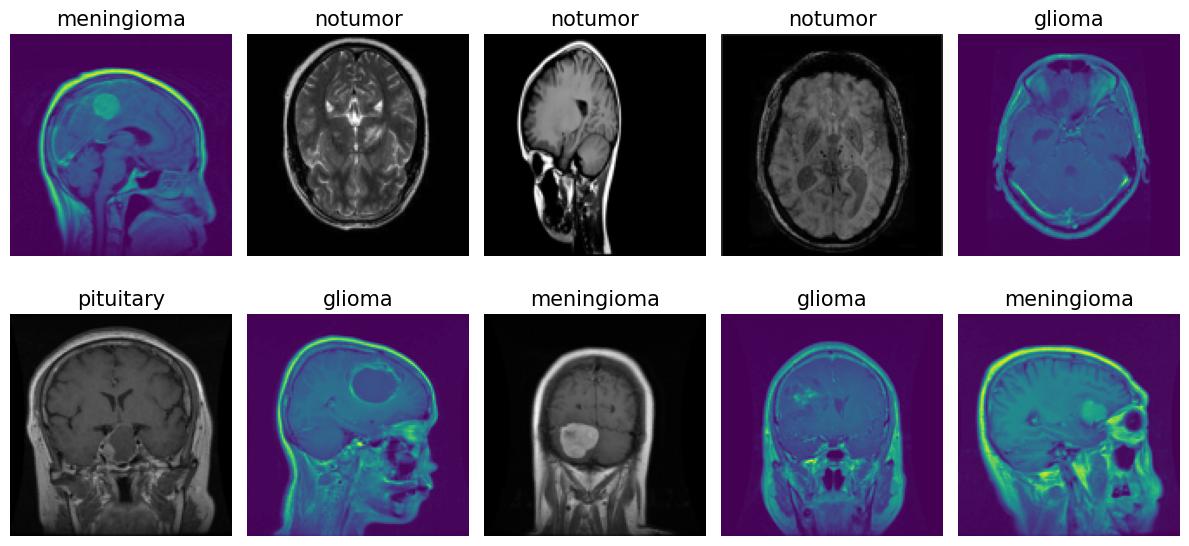

In [13]:
import random
import matplotlib.pyplot as plt
from PIL import Image  # Make sure to import PIL to open images

random_indices = random.sample(range(len(train_paths)), 10)
fig, axes = plt.subplots(2, 5, figsize=(12,6))

axes = axes.ravel()  # Convert axes array to a single list

# Display images
for i, idx in enumerate(random_indices):
    img = Image.open(train_paths[idx])  # Open the image
    img = img.resize((128,128)) # resize the image
    axes[i].imshow(img)  # Display the image
    axes[i].set_title(train_labels[idx], fontsize = 15)  # Set the title as the label
    axes[i].axis("off")  # Hide axis
plt.tight_layout()
plt.show()  # Ensure images are displayed


In [14]:
# Image preprocessing
# Imsge Augmentation Function
def augment_image(image): 
    image = Image.fromarray(np.uint8(image))
    image = ImageEnhance.Brightness(image).enhance(random.uniform(0.8, 1.2))
    image = ImageEnhance.Contrast(image).enhance(random.uniform(0.8, 1.2))
    image = np.array(image)/255.0
    return image

# Load images and apply augmentation
def open_images(paths):
    images = []
    for path in paths:
        img = load_img(path, target_size = (IMAGE_SIZE, IMAGE_SIZE))
        img = augment_image(img)
        images.append(img)
    return np.array(images)

# Encoder labels (Convert label names to integers)
#def encode_label(labels):
#    unique_labels = os.listdir(train_dir)
  #  encoded = [unique_labels.index(label) for label in unique_labels]
 #   return encoded
def encode_label(labels):
    unique_labels = os.listdir(train_dir)  # Get class names
    encoded = [unique_labels.index(label) for label in labels]  # Encode only batch labels
    return np.array(encoded)  # Return numpy array for compatibility

# Data generator for batching
def data_gen(paths, labels, batch_size = 12, epochs = 1):
    for _ in range(epochs):
        for i in range(0, len(paths), batch_size):
            batch_paths = paths[i:i+batch_size]
            batch_images = open_images(batch_paths)
            batch_labels = labels[i:i+batch_size]
            batch_labels = encode_label(batch_labels) # encode labels
            yield batch_images, batch_labels # yield the batch

In [15]:
# Model :
# WE ARE USING VGG16 FOR TRANSFER LEARNING.


In [16]:
len(os.listdir(train_dir))

4

In [17]:
# Model Architecture (Image width = 128, length = 128, with 3 colors i.e., RGB)
IMAGE_SIZE = 128
base_model = VGG16(input_shape = (IMAGE_SIZE, IMAGE_SIZE,3), include_top = False, weights = 'imagenet')

# Freeze all layers of the VGG16 base model
for layer in base_model.layers:
    layer.trainable = False

# Set only the last few layers
base_model.layers[-2].trainable = True
base_model.layers[-3].trainable = True
base_model.layers[-4].trainable = True

# Build Model 
model = Sequential()
model.add(Input(shape=(IMAGE_SIZE, IMAGE_SIZE, 3))) # Input Layer
model.add(base_model) # VGG16 model
model.add(Flatten()) # Flatten Layer
model.add(Dropout(0.3)) # Dropout layer (Drop randomly 30% of the neurons )

model.add(Dense(128, activation = 'relu')) # Dense layer
model.add(Dropout(0.2)) #Dropout Layer

model.add(Dense(len(os.listdir(train_dir)), activation= 'softmax')) # Output layer

# compile the model
model.compile(optimizer= Adam(learning_rate=0.0001), loss = 'sparse_categorical_crossentropy', metrics=['sparse_categorical_accuracy'])

# Parameters
batch_size = 20
steps = int(len(train_paths) / batch_size)
epochs = 5

# Train the model
history = model.fit(data_gen(train_paths, train_labels, batch_size= batch_size, epochs=epochs),
                    epochs=epochs, steps_per_epoch=steps)

Epoch 1/5
285/285 ━━━━━━━━━━━━━━━━━━━━ 1354s 5s/step - loss: 0.6258 - sparse_categorical_accuracy: 0.7454
Epoch 2/5
285/285 ━━━━━━━━━━━━━━━━━━━━ 978s 3s/step - loss: 0.2352 - sparse_categorical_accuracy: 0.9094
Epoch 3/5
285/285 ━━━━━━━━━━━━━━━━━━━━ 552s 2s/step - loss: 0.1709 - sparse_categorical_accuracy: 0.9355
Epoch 4/5
285/285 ━━━━━━━━━━━━━━━━━━━━ 698s 2s/step - loss: 0.1250 - sparse_categorical_accuracy: 0.9520
Epoch 5/5
285/285 ━━━━━━━━━━━━━━━━━━━━ 557s 2s/step - loss: 0.0835 - sparse_categorical_accuracy: 0.9661


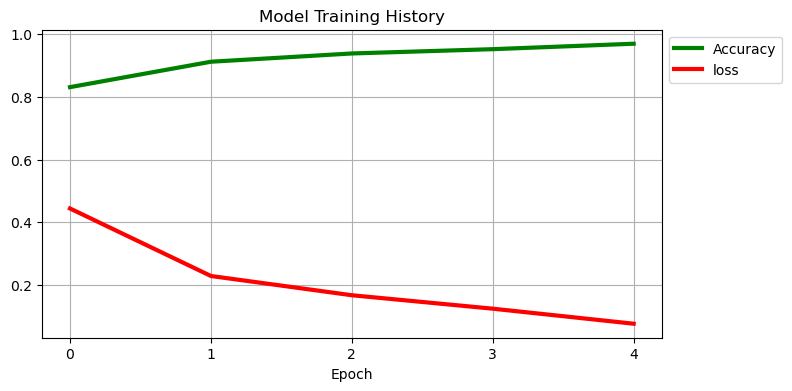

In [18]:
plt.figure(figsize=(8,4))
plt.grid(True)
plt.plot(history.history['sparse_categorical_accuracy'], '-g', linewidth = 3)
plt.plot(history.history['loss'], '-r', linewidth = 3)
plt.title('Model Training History')
plt.xlabel('Epoch')
plt.xticks([x for x in range (epochs)])
plt.legend(['Accuracy', 'loss'], loc = 'upper left', bbox_to_anchor = (1,1))
plt.show()

In [19]:
# Model Classification report

In [21]:
from sklearn.preprocessing import LabelEncoder

def encoded_label(labels):
    encoder = LabelEncoder()
    return encoder.fit_transform(labels)


In [23]:
from sklearn.metrics import classification_report, confusion_matrix, roc_curve, auc
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import label_binarize
import numpy as np

test_images = open_images(test_paths)
test_labels_encoded = encoded_label(test_labels)
test_predictions = model.predict(test_images)
print("Classification Report: ")
print(classification_report(test_labels_encoded, np.argmax(test_predictions, axis = 1 )))

41/41 ━━━━━━━━━━━━━━━━━━━━ 103s 3s/step
Classification Report: 
              precision    recall  f1-score   support

           0       1.00      0.85      0.92       300
           1       0.86      0.99      0.92       306
           2       1.00      0.99      0.99       405
           3       0.99      0.99      0.99       300

    accuracy                           0.96      1311
   macro avg       0.96      0.96      0.96      1311
weighted avg       0.96      0.96      0.96      1311



Confusion Matrix: 
[[255  43   0   2]
 [  0 303   2   1]
 [  0   4 401   0]
 [  0   3   0 297]]


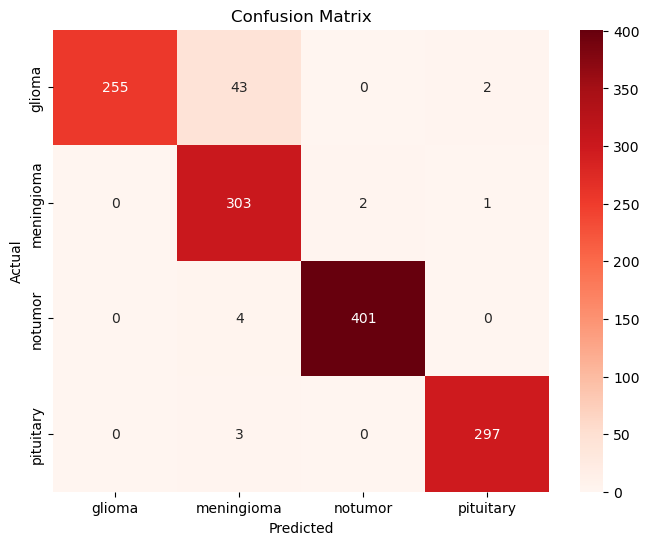

In [39]:
conf_matrix = confusion_matrix(test_labels_encoded, np.argmax(test_predictions, axis = 1))
print('Confusion Matrix: ')
print(conf_matrix)

plt.figure(figsize = (8, 6))
sns.heatmap(conf_matrix, annot = True, fmt = 'd', cmap = 'Reds', xticklabels = os.listdir(train_dir), yticklabels = os.listdir(train_dir))
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title("Confusion Matrix")
plt.show()

41/41 ━━━━━━━━━━━━━━━━━━━━ 102s 2s/step


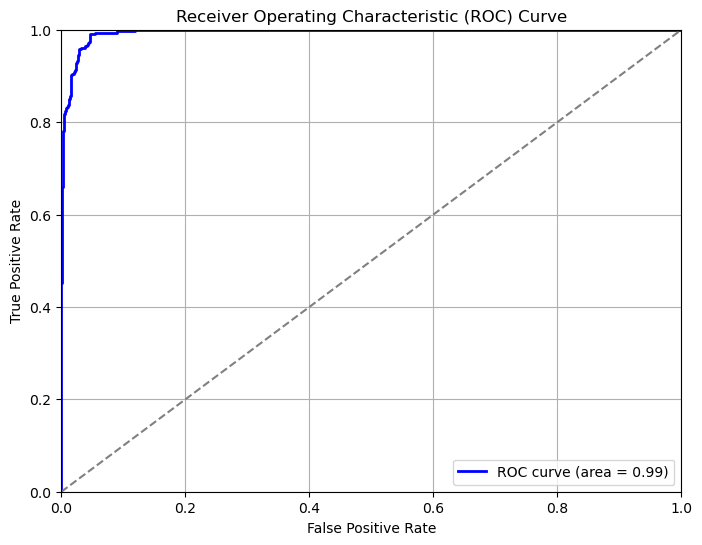

In [27]:
# We don't need this. The next line's(28) code is prefered.
import matplotlib.pyplot as plt
import numpy as np
from sklearn.metrics import roc_curve, roc_auc_score

# Get the predicted probabilities from the model
test_predictions_proba = model.predict(test_images)

# Convert labels to binary format (assuming it's a binary classification problem)
test_labels_binary = (test_labels_encoded == 1).astype(int)  # Adjust based on your class labels

# Compute ROC curve
fpr, tpr, _ = roc_curve(test_labels_binary, test_predictions_proba[:, 1])  # Assuming class index 1 is positive class
roc_auc = roc_auc_score(test_labels_binary, test_predictions_proba[:, 1])

# Plot ROC Curve
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='blue', lw=2, label=f'ROC curve (area = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], color='gray', linestyle='--')  # Diagonal line for reference
plt.xlim([0, 1])
plt.ylim([0, 1])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc='lower right')
plt.grid(True)
plt.show()


41/41 ━━━━━━━━━━━━━━━━━━━━ 103s 3s/step


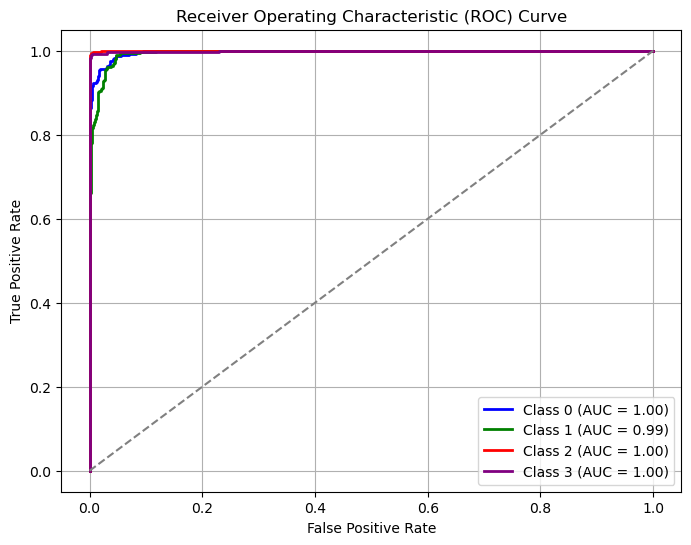

In [29]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import roc_curve, roc_auc_score
from sklearn.preprocessing import label_binarize

# Assuming you have four classes (Class 0, 1, 2, 3)
num_classes = 4

# Binarizing the labels for multi-class ROC curve
test_labels_binarized = label_binarize(test_labels_encoded, classes=[0, 1, 2, 3])

# Get the predicted probabilities from the model
test_predictions_proba = model.predict(test_images)

# Define colors for each class
colors = ['blue', 'green', 'red', 'purple']
labels = ["Class 0", "Class 1", "Class 2", "Class 3"]
auc_scores = []

plt.figure(figsize=(8, 6))

# Loop through each class and calculate its ROC curve
for i in range(num_classes):
    fpr, tpr, _ = roc_curve(test_labels_binarized[:, i], test_predictions_proba[:, i])
    auc = roc_auc_score(test_labels_binarized[:, i], test_predictions_proba[:, i])
    auc_scores.append(auc)
    
    # Plot the ROC curve for each class
    plt.plot(fpr, tpr, color=colors[i], lw=2, label=f'{labels[i]} (AUC = {auc:.2f})')

# Reference diagonal line (random classifier)
plt.plot([0, 1], [0, 1], color='gray', linestyle='--')

# Label the axes
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc='lower right')
plt.grid(True)
plt.show()


In [31]:
for i in range(4):  # Assuming four classes
    auc = roc_auc_score(test_labels_binarized[:, i], test_predictions_proba[:, i])
    print(f"Class {i} AUC: {auc:.2f}")


Class 0 AUC: 1.00
Class 1 AUC: 0.99
Class 2 AUC: 1.00
Class 3 AUC: 1.00


In [33]:
# Save the entire model
model.save('model.keras')

In [35]:
from tensorflow.keras.models import load_model
# Load the training model
model = load_model('model.keras')

In [57]:
from keras.preprocessing.image import load_img, img_to_array
class_labels = ['pituitary', 'glioma', 'notumor', 'meningioma'  ]
def detect_and_display(image_path, model):
    try:
        # load image
        img = load_img(image_path, target_size=(128,128))
        img_array = img_to_array(img)
        img_array = np.expand_dims(img_array, axis = 0)
        # prediction
        predictions = model.predict(img_array)
        predicted_class_index = np.argmax(predictions)
        confidence_score = np.max(predictions, axis = 1)[0]
        # determine the class
        if class_labels[predicted_class_index] == 'notumor':
            return "No Tumor Detecdet"
        else : f"Tumor: {class_labels[predicted_class_index]}"
            
        # display
        plt.imshow(load_img(img_path))
        plt.axisI('off')
        plt.title(f"{result} (Confidence:) {confidence_score * 100:.2f}%")
        plt.show()
    except Exception as e:
        print("Error processing the image:", str(e))

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 448ms/step


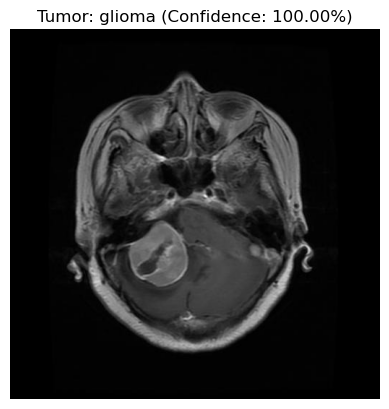

In [81]:
# Example usage
image_path = "Brain_tumor_detection/Training/meningioma/Tr-me_0021.jpg"
detect_and_display(image_path, model)

In [85]:
from keras.preprocessing.image import load_img, img_to_array
import numpy as np
import matplotlib.pyplot as plt

class_labels = ['pituitary', 'glioma', 'notumor', 'meningioma']

def detect_and_display(image_path, model):
    try:
        # Load image
        img = load_img(image_path, target_size=(128,128))
        img_array = img_to_array(img)
        img_array = np.expand_dims(img_array, axis=0)

        # Prediction
        predictions = model.predict(img_array)
        predicted_class_index = np.argmax(predictions)
        confidence_score = np.max(predictions, axis=1)[0]

        # Determine the class
        result = f"Tumor: {class_labels[predicted_class_index]}" if class_labels[predicted_class_index] != 'notumor' else "No Tumor Detected"

        # Display
        plt.imshow(load_img(image_path))
        plt.axis('off')
        plt.title(f"{result} (Confidence: {confidence_score * 100:.2f}%)")
        plt.show()

    except Exception as e:
        print("Error processing the image:", str(e))


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 444ms/step


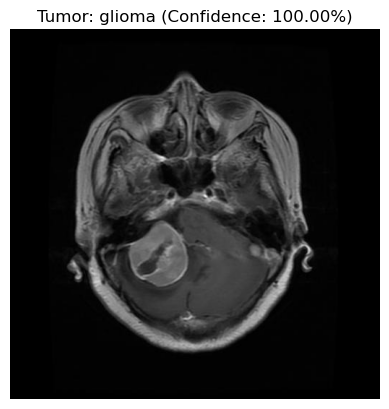

In [89]:
# Example usage
image_path = "Brain_tumor_detection/Training/meningioma/Tr-me_0021.jpg"
detect_and_display(image_path, model)